# Quantum Walk Assignment

## Quantum Walk 

The quantum walk is a natural analog of classical random walk, where the particle moves in a random path. The random walk methods are nondeterministic (probabilistic or stochastic) numerical methods employed in solving mathematical and physical problems including the probabilistic theory of random process dealing with Brownian motion or random-walk experiments and potential theory, which studies the equilibrium states of a homogeneous medium. It is a method of approximately solving problems using sequences of random numbers. It is a means of treating mathematical problems by finding a probabilistic analog and then obtaining approximate answers to this analog by some experimental sampling procedure. 

It also can be used for search algorithms and solving specific mathematical problems efficiently. So, we can use the quantum walk for search algorithms and especially as a tool for quantum query algorithms, providing potential speedups for problems that are unsolvable by classical computers.For some oracular problems, quantum walks provide an exponential speedup over any classical algorithm. Quantum walks also give polynomial speedups over classical algorithms for many practical problems, such as the element distinctness problem, the triangle finding problem.

There are two types of quantum walks so one is continuous-time Quantum walks and the second is discret-time Quantum walks. we will focus on the discrete time version.

###  Discrete-time Quantum Walk 
Given a classical graph G = (V, E), where V and E are the Vertices(nodes) and the Edges(the connected nodes) of the G, respectively. In the simplest discrete-time random walk on the Graph, we simply move from any given vertex to each of its neighbors with equal probability at each time step. So, the quantum walk is governed by the |V|×|V| matrix M with the following elements for every pair j, k ∈ V :

$$ M_j{_k} = 
     \begin{cases}
       \text{1/ deg(k),} &\quad\text{(j, k) ∈ E}\\
       \text{0.} &\quad\text{Otherwise}\\
     \end{cases}$$

where deg(k) denotes the degree of vertex k (normalization factor). An initial probability distribution p over the vertices evolves to p' = M p after one step of the walk.

We would like to specify a unitary operator U with the property that an input state $|j>$ corresponding to the vertex j ∈ V evolves to a superposition of the neighbors of j. So, $|j>$ encodes a vertex. So, we have 

$$ |j> → |∂j> := \frac{1}{\sqrt{ deg(j)}} \sum\limits_{k:(j,k)∈E}{|k>} $$

Note that $|k>$ also encodes the only connected vertex to node j. The equation shows the sum of all nodes that is connected to node j. Unfortunately, this transformation is not always a unitary opeartor, since the orthogonal states $|j>$ and $|k>$ corresponding to adjacent vertices j, k with a common neighbor $l$ evolve to non-orthogonal states. To overcome this problem, we can enlarge the Hilbert space.

Let the Hilbert space consist of states of the form $|j, k>$ where $(j, k) ∈ E$. We can think of
the walk as taking place on the (directed) edges of the graph; the state $|j, k>$ represents a walker at vertex j that will move toward vertex k. Each step of the walk consists of two operations. First, we apply a unitary transformation that operates on the second register conditional on the first register. This transformation is sometimes referred to as a “coin flip,” as it modifies the next destination of the walker. A common choice is the Grover diffusion operator over the neighbors of j, namely

$$ C := \sum\limits_{j∈V}{|j><j|⊗(2|∂j><∂j| - I)} $$ 

Next, the walker is moved to the vertex indicated in the second register. Of course, since the process must
be unitary, the only way to do this is to swap the two registers using the operator

$$ S := \sum\limits_{(j,k)∈E}{|j, k><k, j|} $$


Overall, one step of the discrete-time quantum walk is described by the unitary operator SC.


## Problem:

We are going to design th quantum walk operator for a line with 16 nodes. The nodes are arranged sequenrially, and each node is connected to its neighbor nodes. So, the participle will move from its current node to an adjacent node (left or right) with equal chance.

$ Nodes :   V = \{0, 1, 2, 3, \dots\,, 15\}  $

$ Edges:    E = \{(0,1), (1,2), (2,3), \dots\,, (14,15) + symm.\}  $

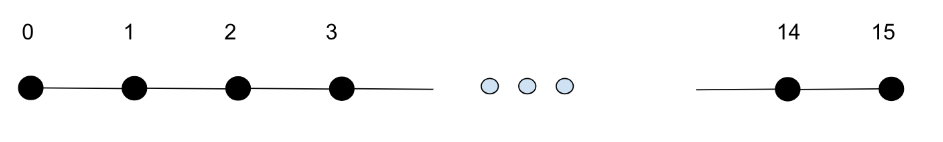

Womanium Quantum + AI Scholarip Program with Classiq 

Since we have 16 nodes in the graph and each node is represented by the state of a qubit,  we need 4 qubits to create $ 2^4 = 16$ states.


## Import necessary libraries

In [1]:
import classiq
from classiq import *
classiq.authenticate()
from classiq.execution import ExecutionPreferences
from classiq import show
from classiq.qmod.symbolic import logical_or


C:\Users\HAMID\AppData\Local\Programs\Python\Python311\Lib\site-packages\classiq\_internals\authentication\token_manager.py:99: UserWarning: Device is already registered.
Generating a new refresh token should only be done if the current refresh token is compromised.
To do so, set the overwrite parameter to true
  warnings.warn(


Number of qubits required to represent the vertices (size) and the number of nodes ($2^{size} $)

In [2]:
size = 4 

## Encoding
We would like to specify a unitary operator U with the property that an input state $|j>$ corresponding to the vertex j ∈ V evolves to a superposition of the neighbors of j. So, $|j>$ encodes a vertex. We consider QNum register as vertices. 
Also, another QNum register is considered for only connected vertices to node j as adjacent_vertices.

                 main(vertices:Output[QNum], adjacent_vertices :Output[QNum]):

## Evolution
The evolution of a quantum walk in discrete time is specified by the product of two unitary operators:
- Coin flip Operator (C operator or W operator): determines the walker's movement probabilities
- Conditional Shift Operator (S operator): implement the actual movement to indicated vertices based on the first quantum register  


## C Operator (W Operator)

First, we apply a unitary transformation that operates on the second register conditional on the first register. This transformation is sometimes referred to as a “coin flip,” as it modifies the next destination of the walker. A common choice is the Grover diffusion operator over the neighbors of j, namely

$$ C := \sum\limits_{j∈V}{|j><j|⊗(2|∂j><∂j| - I)}$$ 

where $ |∂j> = U_j|0> = \frac{1}{\sqrt{ deg(j)}} \sum\limits_{k:(j,k)∈E}{|k>} $. The $ U_j$ is a unitary operator and acts on |0> sate and generate $ |∂j>$ state. $ |∂j> $ shows a superposition of all vertices connected to node j. 

In C operator, summation is performed over all the vertices in the set V. A simple method to implement the summation over all the vertices in C operator is to use the Hadamard transformation :

                                hadamard_transform(vertices);

Another method is to apply "repeat function" in Qmod native platform over all the vertices as follow:

                                repeat(j:2**(vertices.size)-1){
                                
We implement the summation in C Operator using W_operator function in the python. 

                        def W_operator(vertices:QNum, adjacent_vertices: QNum):
                                
The $|j><j|$ is projection operator on $|j>$ state and is used as controller. It means that if only the state is $|j>$ then the corresponding opertator ($ (2|∂j><∂j| - I)$) will be apply.  
Using $ (2|∂j><∂j| - I) = U_j(2|0><0| - I) {U_j}^\dagger $, we can implement the $ (2|∂j><∂j| - I)$.
Note that the operator $(2|0><0| - I)$ has an eigen state |0> with eigen value 1 and when we apply on the other integer states ($|j\neq0>$), we receive eigen value -1, so it is exact the phase kickback operator. If we apply it on a general state $|x>$, we obtain $ (-1)^{x\neq0}|x>$  that can be implemented by zero_diffuzer function that includes prepare_minus, diffuzer_oracle functions to amplify the probabilities of adjacent nodes. 

 $$ (2|0><0| - I)|0> = |0> \ and  \   (2|0><0| - I)|j\neq0> = -|j\neq0> $$
 
 $$ Phase\ kickback: \   (2|0><0| - I)|x> = (-1)^{x\neq0}\ |x> $$ 

The C operator modifies the walker's state by assigning probability to move left or right from each node. For first and last nodes, we only have one chioce. if the walker is at node 0, the C operator will set the probability 1 to move to the right node (node 1). If the walker is at node 15, it will set the probability 1 to move to the left node (node 14). For the middles nodes, the probabilities are 0.5 to move either left or right. This operation is implemented using C_iteration function.

                                                             prob = [0]*(2**size)
    state = 0 , prob vect = [0, 1, 0 , 0 , ..., 0]        -> prob[i + 1] = 1.0
    state = 1 , prob vect = [0.5, 0, 0.5 , 0 , ..., 0]    -> prob[i - 1] = 0.5, prob[i + 1] = 0.5
    state = 2 , prob vect = [0, 0.5, 0 , 0.5 , 0, ..., 0] -> prob[i - 1] = 0.5, prob[i + 1] = 0.5
            .                                                            .
            .                                                            .
            .                                                            .
    state = 14, prob vect = [0, 0, 0 , ...,0.5, 0, 0.5]   -> prob[i - 1] = 0.5, prob[i + 1] = 0.5
    state = 15, prob vect = [0, 0, 0 , ...,0, 1, 0]       -> prob[i - 1] = 1.0


In [7]:
# Prepares a qubit in the |-> state for phase kickback algorithm 
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

@qfunc
def diffuzer_oracle(aux: Output[QNum],x:QNum):
    aux^=(x!=0)

# Implements the zero diffuser for the phase kickback in quantum walk
@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

# Implements the C operator for each node , i is the node index from 0 to 15
def C_iteration(i:int,vertices: QNum, adjacent_vertices:QNum):
    
    prob = [0]*(2**size)   # Initializing  probabilities for 16 nodes of graph
    if i == 0:
        prob[i + 1] = 1.0  # for the first node, move to the node 1 with prob. 1
    elif i == 2**size - 1:
        prob[i - 1] = 1.0  # for the last node, move to the node 14 with prob. 1 
    else:
        prob[i - 1] = 0.5  # for the middle nodes to move the left node
        prob[i + 1] = 0.5  # for the middle nodes to move the right node
    print(f'Node={i}, prob vec ={prob}')
    
    """
    Using control function, if only the state is |i> then 
    the corresponding opertator (2|∂i><∂i| - I) = Uj(2|0><0| - I)dagger(Uj) will be apply
    
    inplace_prepare_state function prepares the Uj to generate |∂i> = Uj|0>
    
    zero_diffuzer(adjacent_vertices) amplifies the probabilities of adjacent nodes
    and implement (2|0><0| - I) operator
    """
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

# Performs the summation over all the nodes in C operator 
@qfunc 
def C_operator(vertices:QNum, adjacent_vertices: QNum):
    for i in range(2**size):
        C_iteration(i,vertices,adjacent_vertices)

## Conditional Shift Operator (S Operator)

After determining the movement probabilities using C operator, the shift operator is applied.
Next, the walker is moved to the vertex indicated in the second register. This operator performs the movement by swapping the walker's state between nodes according to the probabilities set by the C operator. Of course, since the process must be unitary, the only way to do this is to swap the two registers using the operator:

$$ S := \sum\limits_{(j,k)∈E}{|j, k><k, j|} $$

In S operator, we see the summation over all the edges in the graph. As observed, we have a swap conditioned if two vertices have an edge connecting two vertices. Otherwise, we do not want to do any swap. So, we need to design an oracle to find two vertices that contain an edge between them. In our assignment, two vertices are adjacent only if the difference between them is equal 1 or -1. To check if two vertices are adjacent, we employ the edge_oracle function as:

                edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):

If the res value is one, two vertices will be adjacent. For example, if vertices = 5 and adjacent_vertices = 4 or 6, the value of res will be 1 and if vertices = 2 and adjacent_vertices = 8 , the value of res will be zero. In fact, this a kind of encoding, it shows how to encode the data into the algorithm (encoding the set of edges). We encode it with this Quantum oracle(edge_oracle).

To implement S operator, we use "S_operator" function with two inputs (vertices, adjacent vertices). First we declare and initialize a new qubit ($ \ QNum(\ 'res')\ $) into function and then we apply edge_oracle to check if two vertices are connected by an edge or not. The output of edge_oracle is the res and so we control if only the value of res is one, we apply bitwise swap between the vertices and the adjacent_vertices. It is obvious that the specific values of vertices are used in S Opertor, unlike of the C operator that uses all values of vertices.


In [8]:
# Oracle checks if two vertices are adjacent
@qfunc
def edge_oracle(res:Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

# Swaps the values of two QArrays of vertices in S operator
@qfunc 
def bitwise_swap(x: QArray[QBit], y:QArray[QBit]):
    repeat(count= x.len,
           iteration= lambda i: SWAP(x[i],y[i])) 

# Applies the shift operator to swap two adjacent vertices 
@qfunc 
def S_operator(vertices:QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

## Description of the quantum walk in the unitary operator SC

In main function, first we initialize vertices and allocate 4 qubits for them. We then apply Hadamard transform to all vertices to generate an equal superposition of all possible positions of the vertices along the line. 
In mathematical terms,
$$ |\psi> = \frac{1}{\sqrt{2^4}}(|0> + |1> + \dots + |15>) $$

Then, we also initialize the adjacent vertices and allocate 4 qubits for them to have $2^4 = 16 $ states to assign the adjacent vertices. Finally, we apply C operator and S operator to vertices and adjacent_vertices in superposition states, respectively. 


In [9]:
@qfunc 
def main(vertices:Output[QNum], adjacent_vertices:Output[QNum]):
    allocate(size, vertices)  
    hadamard_transform(vertices)  
    allocate(size, adjacent_vertices)  
    
    C_operator(vertices, adjacent_vertices) 
    S_operator(vertices, adjacent_vertices)  

## Create the circuit.

In [11]:
# Create and synthesize the quantum model
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

## Synthesized Circuit
The synthesized circuit has been shown in the following figure. The number of qubits (width) required for circuit is 37 qubits. Since there are 4 qubits for 16 nodes(16 different probability vectors), we have 16 zero_diffuzer operators to amplify the probabilities of adjacent nodes in C operatot. The program has been synthesized and optimized without constraints as follow:

### Program info.:
Depth: 5317 and width: 37
Gate count : H: 936, X:555, CU1: 175, U2:128, U1:256, TDG: 659, RY:180, P:540, CP:128, Zero_diffuzer: 16 

### Transpiled Circuit info.:
Depth: 3091 and width: 37
Gate count : U: 2777, CX: 2635

First, the Hadamard gates are applied to all 4 qubits to create an equal superposition of all possible positions of the vertices along the line, allowing the walker to have a non-zero probability of being at any of the 16 nodes.Then, we apply C operator to all vertices and adjacent vertices and some auxiliary qubis. Finally, S operator is applied to the vertices that contain an edge between them. 
Zooming in the circuit, we will investigate the C operator and S operator blocks details of the implemented circuits. 

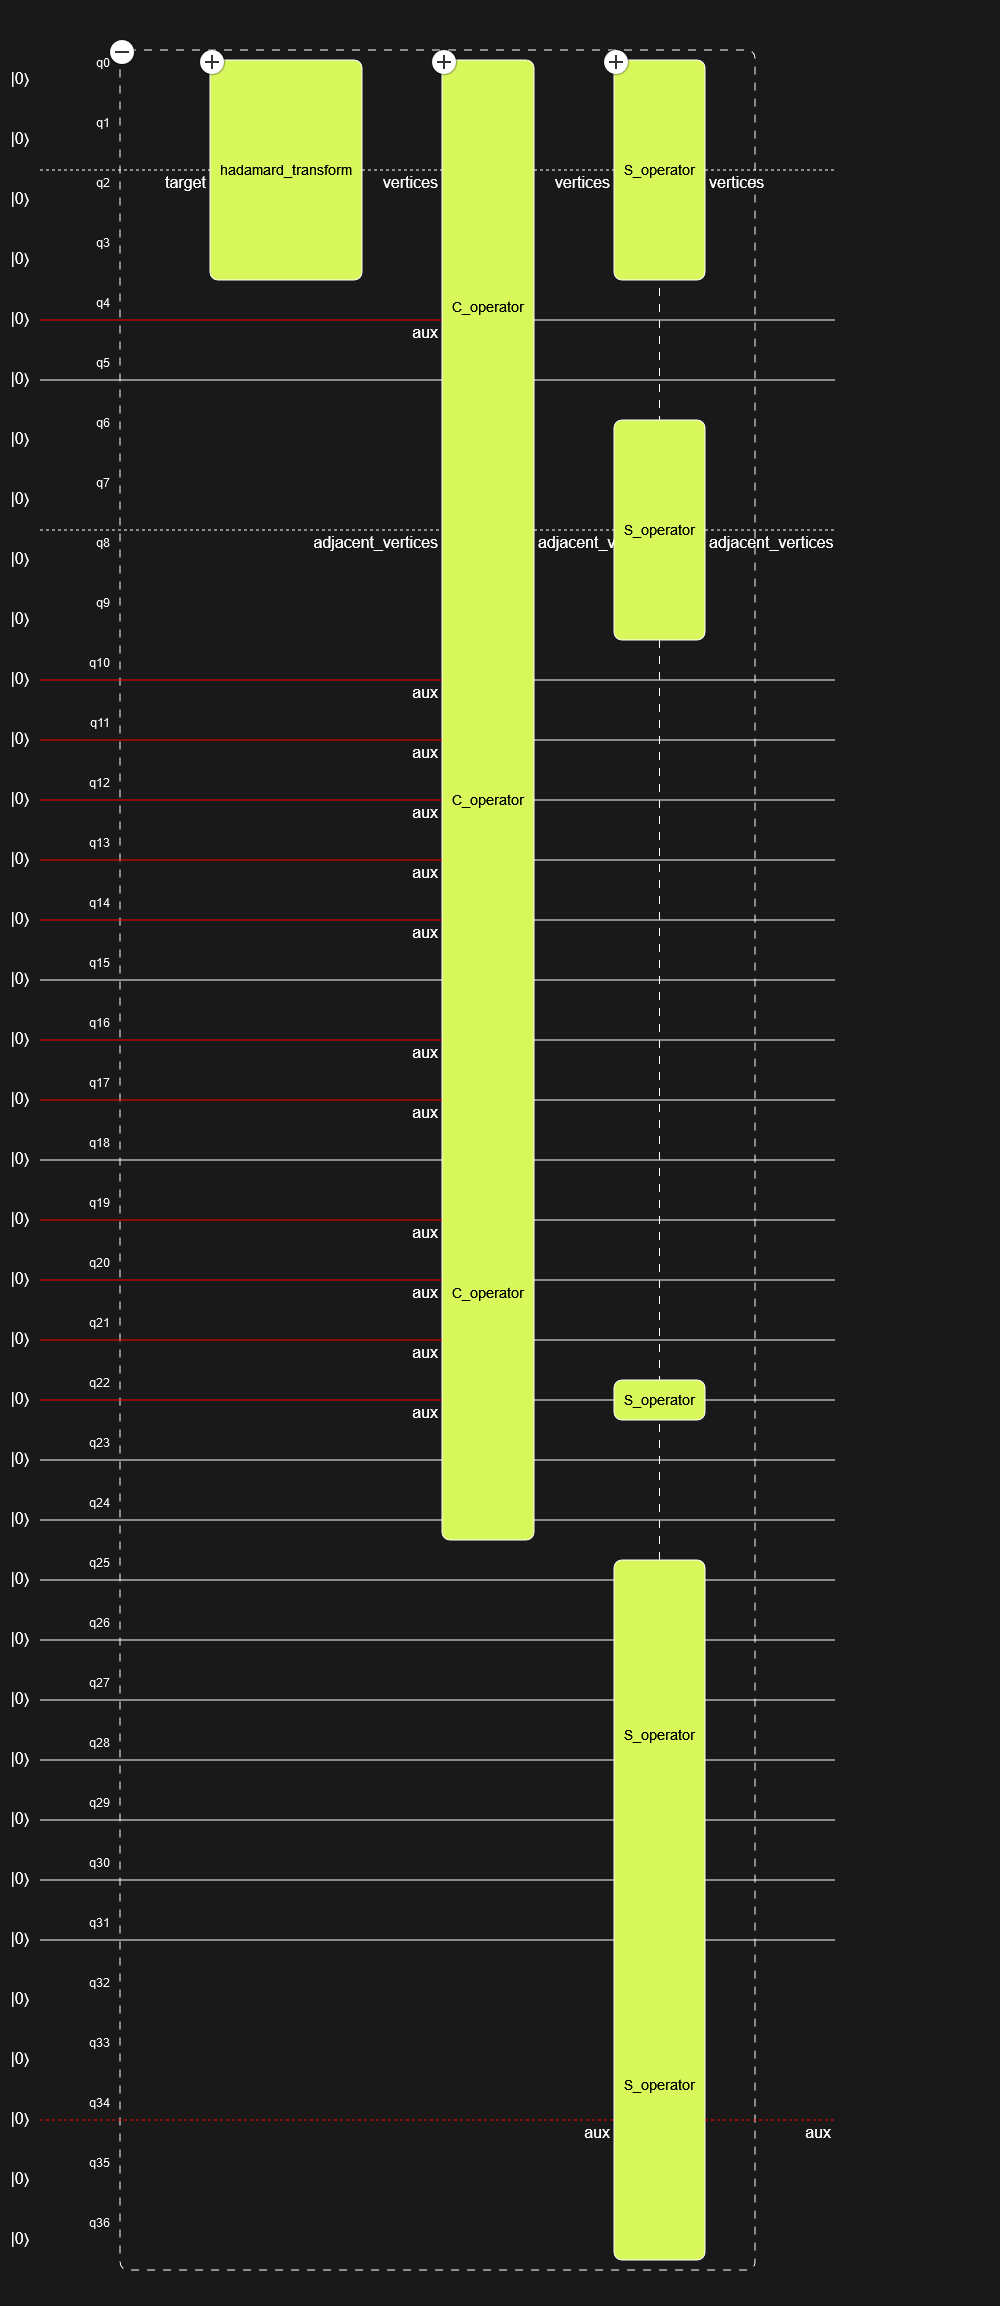

## Transpiled  and Program circuits Info.


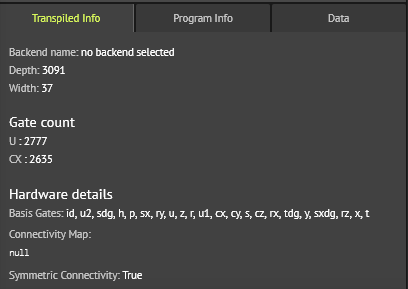

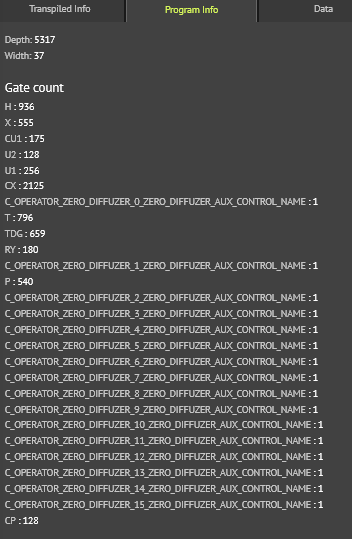

Let us start with the S operator!

## S operator circuit


Edge_oracle blocks checks if the vertex and an adjacent vertex are connected by an edge. It recieves the vertices and the adjacent vertices and the result is 1 if the vertices and the adjacent vertices are connected by an edge. It sets a flag qubit (res) to indicate this. If the edge oracle shows that a vertex and an adjacent vertex are adjacencent, the bitwise swap operation swaps the states of the vertices and adjacent_vertices qubits. Bitwise swap blocks are controlled by a res qubit. The swap operation only occurs if the vertices are  adjacent.    

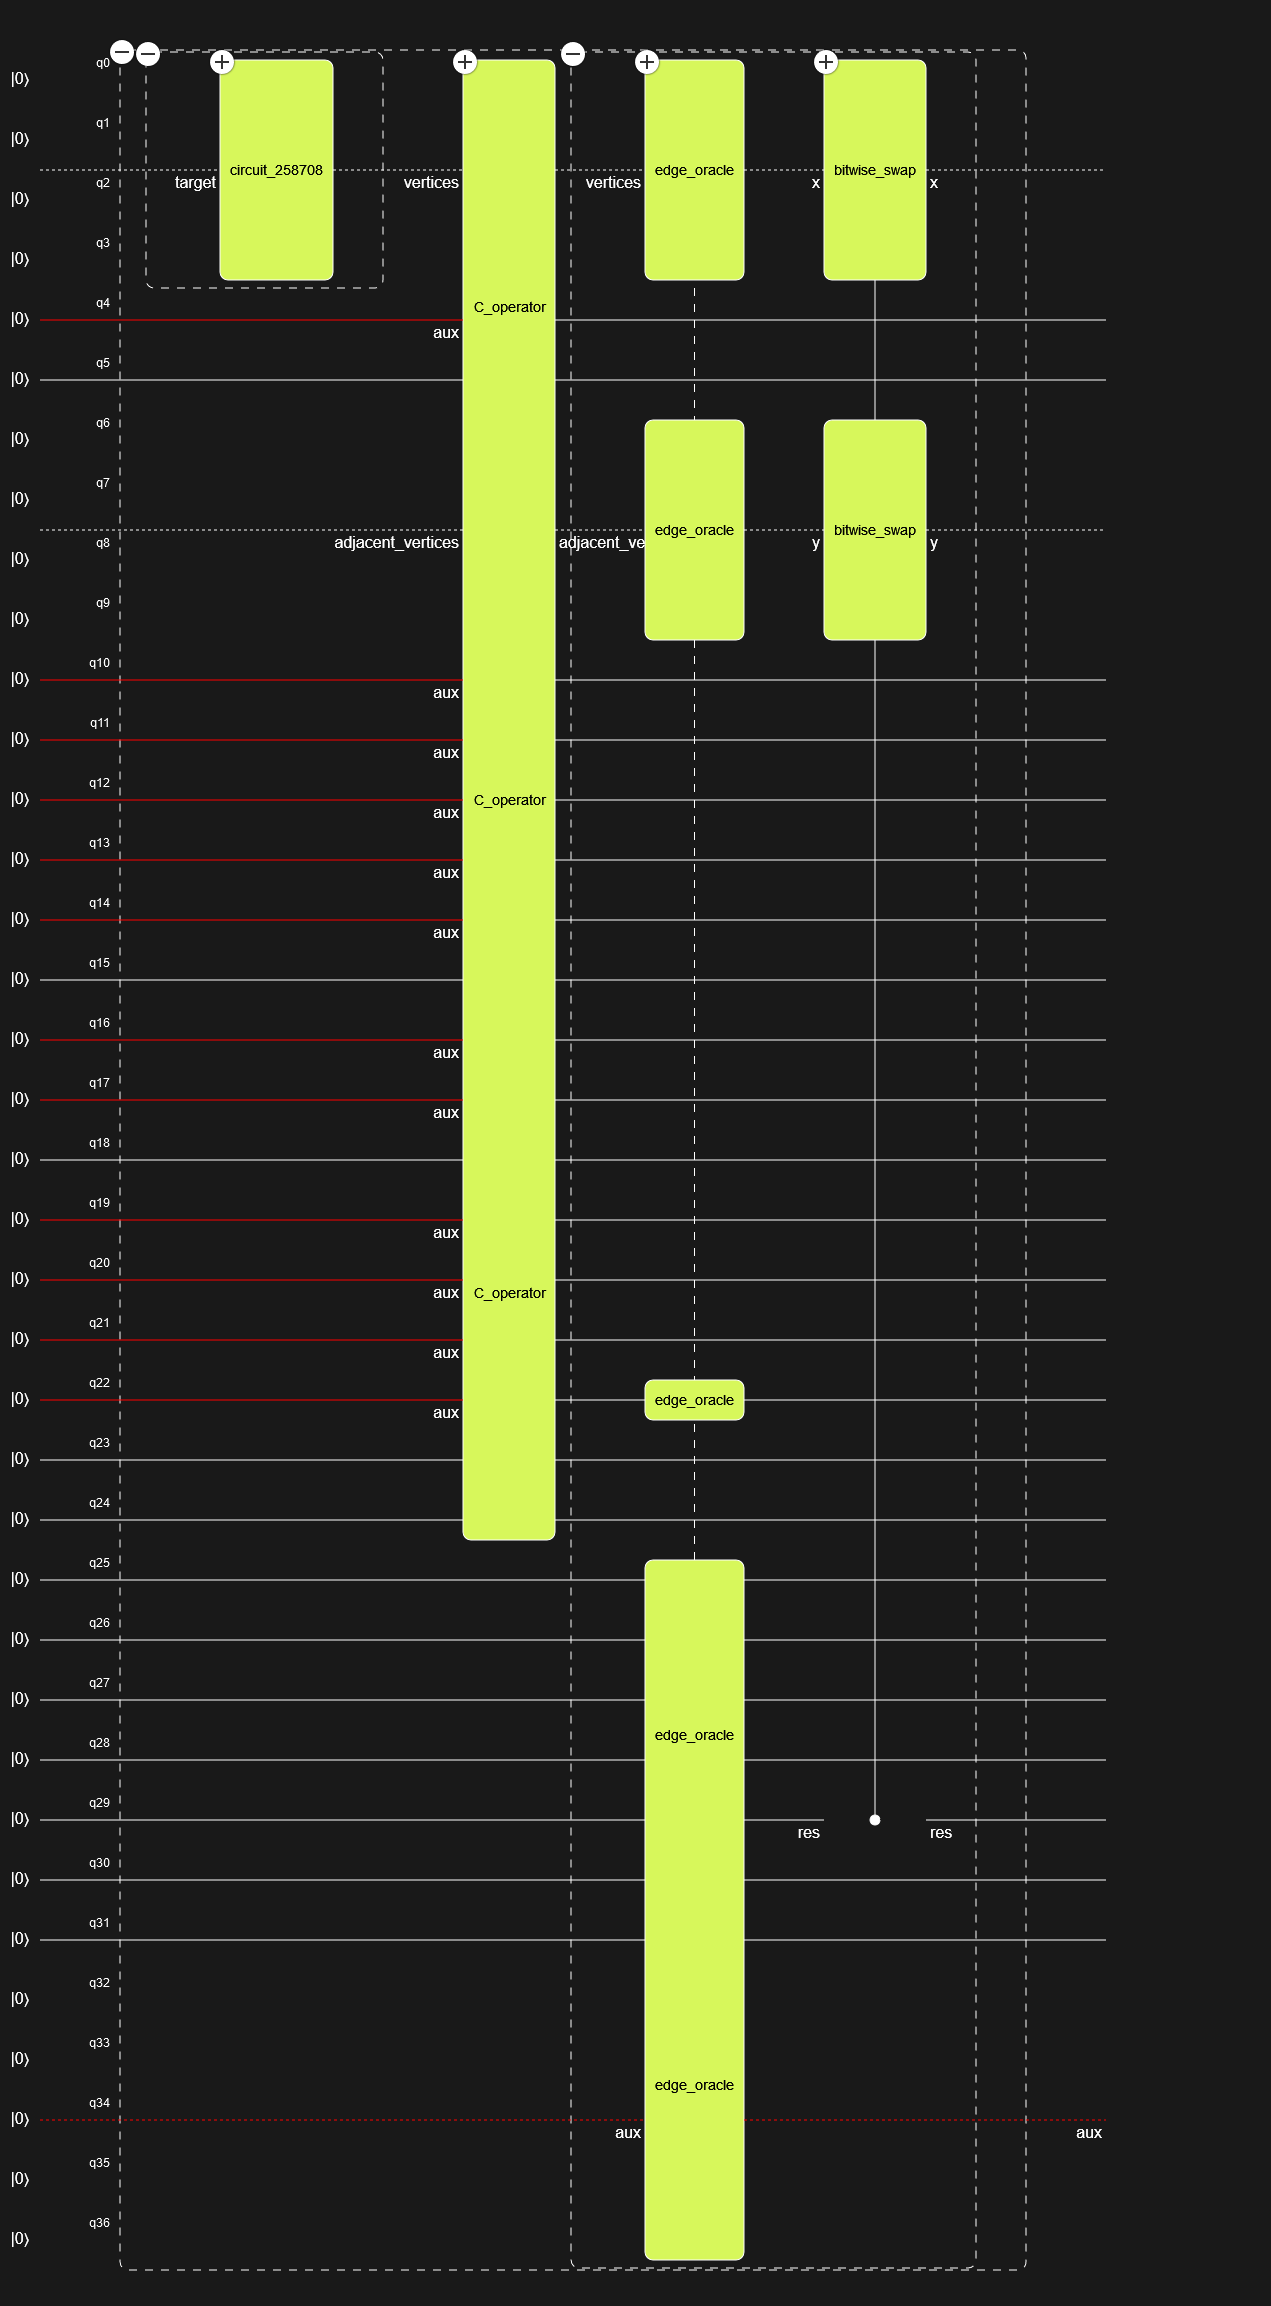

## C operator circuit
We have 16 repetitions of state preparation and inverse state preparation blocks and Zero diffuser block for each of 16 probabilistic states (nodes). Zero diffuzers are applied based on the states of the vertices qubits. In fact, we have different probability vectors for each node (state). State preparation block prepares the probabilities at each node for moving to adjacent vertices. For each node, this block sets the probability amplitudes for the walker to move to its neighboring nodes. Zero diffuser block applies the diffusion operator((2|0><0| - I)) to amplify the probabilities of adjacent nodes. The aux qubit is employed to perform this operation. 

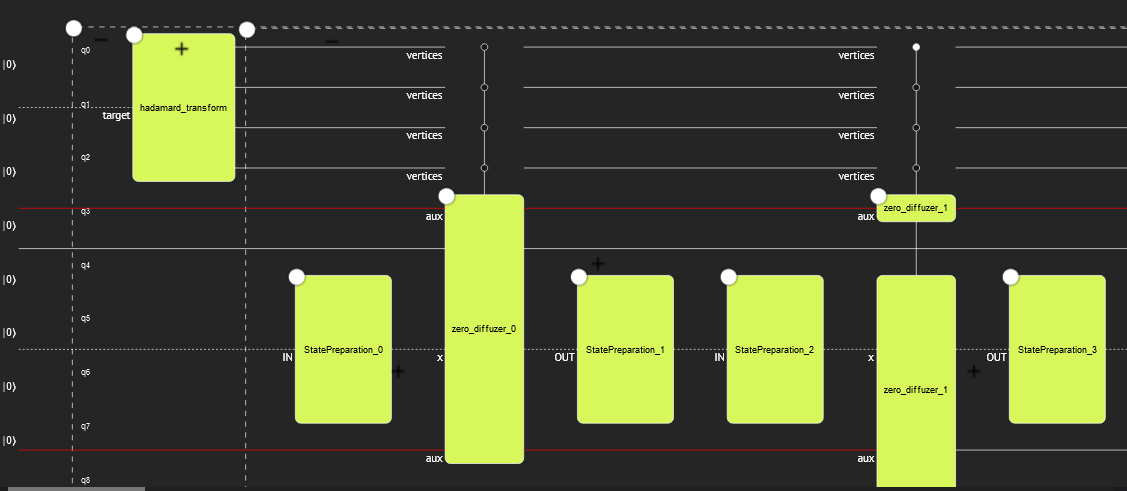